In [42]:
# https://matplotlib.org/stable/tutorials/introductory/quick_start.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path  import Path
import matplotlib.patches as patches

### Remenn Approximation

In [43]:
def RemennApprox(f,a,b,n):
    x=np.linspace(a,b,n+1)
    dx=(b-a)/n
    y=f(x)
    r=np.sum(y[:-1])*dx
    return r
def TrapZoidApprox(f,a,b,n):
    x=np.linspace(a,b,n+1)
    dx=(b-a)/n
    y=f(x)
    r=np.sum(y[1:-1])*dx
    return r+(y[-1]+y[0])*dx/2
def SimpsonsApprox(f,a,b,n):
    
    if n%2==1:
        raise "n must be even"
    x=np.linspace(a,b,n+1)
    dx=(b-a)/n
    y=f(x)
    
    C=n//2  #抛物线的段数
    weight=[1,4]
    weight.extend([2,4]*(C-1))
    weight.append(1)
    
    r=np.sum(y*np.array(weight))*dx*2/6
    return r

In [44]:
#test one
oneOverX=lambda x:1/x
a,b,n=1,2,2
oneOverXAnswer=lambda :np.log(b)-np.log(a)

print(RemennApprox(oneOverX,a,b,n)-oneOverXAnswer())
print(TrapZoidApprox(oneOverX,a,b,n)-oneOverXAnswer())
print(SimpsonsApprox(oneOverX,a,b,n)-oneOverXAnswer())

0.14018615277338797
0.015186152773387973
0.0012972638844990225


In [45]:
#test two
sinX=lambda x:np.sin(x)
a,b,n=0,np.pi,4
sinXAnswer=lambda :np.cos(a)-np.cos(b)


print(RemennApprox(sinX,a,b,n)-sinXAnswer())
print(TrapZoidApprox(sinX,a,b,n)-sinXAnswer())
print(SimpsonsApprox(sinX,a,b,n)-sinXAnswer())

-0.1038811020629602
-0.1038811020629602
0.0045597549844207386


$\sqrt{\pi}=\int e^{-x^2}$

In [195]:
gause_func=lambda x:np.exp(-x*x)
gause_answer=np.sqrt(np.pi)
# w>5，SimpsonsApprox效果为什么不如黎曼好呢？
w=2
a,b,n=-w,w,10
print("%e"%(RemennApprox(gause_func,a,b,n)-gause_answer))
print("%e"%(TrapZoidApprox(gause_func,a,b,n)-gause_answer))
print("%e"%(SimpsonsApprox(gause_func,a,b,n)-gause_answer))

-1.019263e-02
-1.019263e-02
-8.494546e-03


In [196]:
def quickPatch(xy):
    n=len(xy)
    codes=[Path.MOVETO]+[Path.LINETO]*(n-1)+[Path.CLOSEPOLY]
#     path=Path(xy+[xy[0]],codes)
#     patch=patches.PathPatch(path,facecolor=color,lw=1,alpha=0.5)
    return xy+[xy[0]],codes

def composePatch(xy,codes):
    paths=Path(xy,codes)
    pathpatch=patches.PathPatch(paths,facecolor='none')
    return pathpatch

In [197]:
#  函数f在[a,b]上的图像
def FuncPatch(f,a,b,N):
    t=np.linspace(a,b,N)
    ft=f(t)
    l=plt.Line2D(t,ft)
    return l
#  函数f在[a,b]上的黎曼近似
def RemenPatch(f,a,b,n):
    x=np.linspace(a,b,n+1)
    y=f(x)
    
    xy=[]
    codes=[]
    for i in range(n):
        vertices=[
            (x[i],0),
            (x[i+1],0),
            (x[i+1],y[i]),
            (x[i],y[i])
         ]
        _xy,_codes=quickPatch(vertices)
        xy+=_xy 
        codes+=_codes
    return composePatch(xy,codes)
#  函数f在[a,b]上的TrapZoid近似
def TrapZoidPatch(f,a,b,n):
    x=np.linspace(a,b,n+1)
    y=f(x)
    
    xy=[]
    codes=[]
    for i in range(n):
        vertices=[
            (x[i],0),
            (x[i+1],0),
            (x[i+1],y[i+1]),
            (x[i],y[i])
         ]
        _xy,_codes=quickPatch(vertices)
        xy+=_xy 
        codes+=_codes
    return composePatch(xy,codes)

#  函数f在[a,b]上的Simpsons近似
def SimpsonsPatch(f,a,b,n):
    x=np.linspace(a,b,n+1)
    y=f(x)
    
    xy=[]
    codes=[]
    for i in range(0,n,2):
        
        #产生x[i]-x[i+2]之前的图像
        c1,c2,c3=np.polyfit([x[i],x[i+1],x[i+2]],[y[i],y[i+1],y[i+2]],2)
        
        t=np.linspace(x[i],x[i+2],30)
        subFt=c1*(t**2)+c2*t+c3
        
        #分段函数的 初始点
        xy.append((x[i],0))
        codes.append(Path.MOVETO)
        
        #抛物线部分
        for p in zip(t,subFt):
            xy.append(p)
            codes.append(Path.LINETO)
        
        #闭合曲线
        xy+=[(x[i+2],0),(x[i],0)]
        codes+=[Path.LINETO,Path.CLOSEPOLY]
        
    return composePatch(xy,codes)

def drawGraph(ax,f_item,patch_item):
    ax.add_line(f_item)
    ax.add_patch(patch_item)

    ax.set_xlabel('t')
    ax.set_ylabel('f(t)')
    ax.legend()

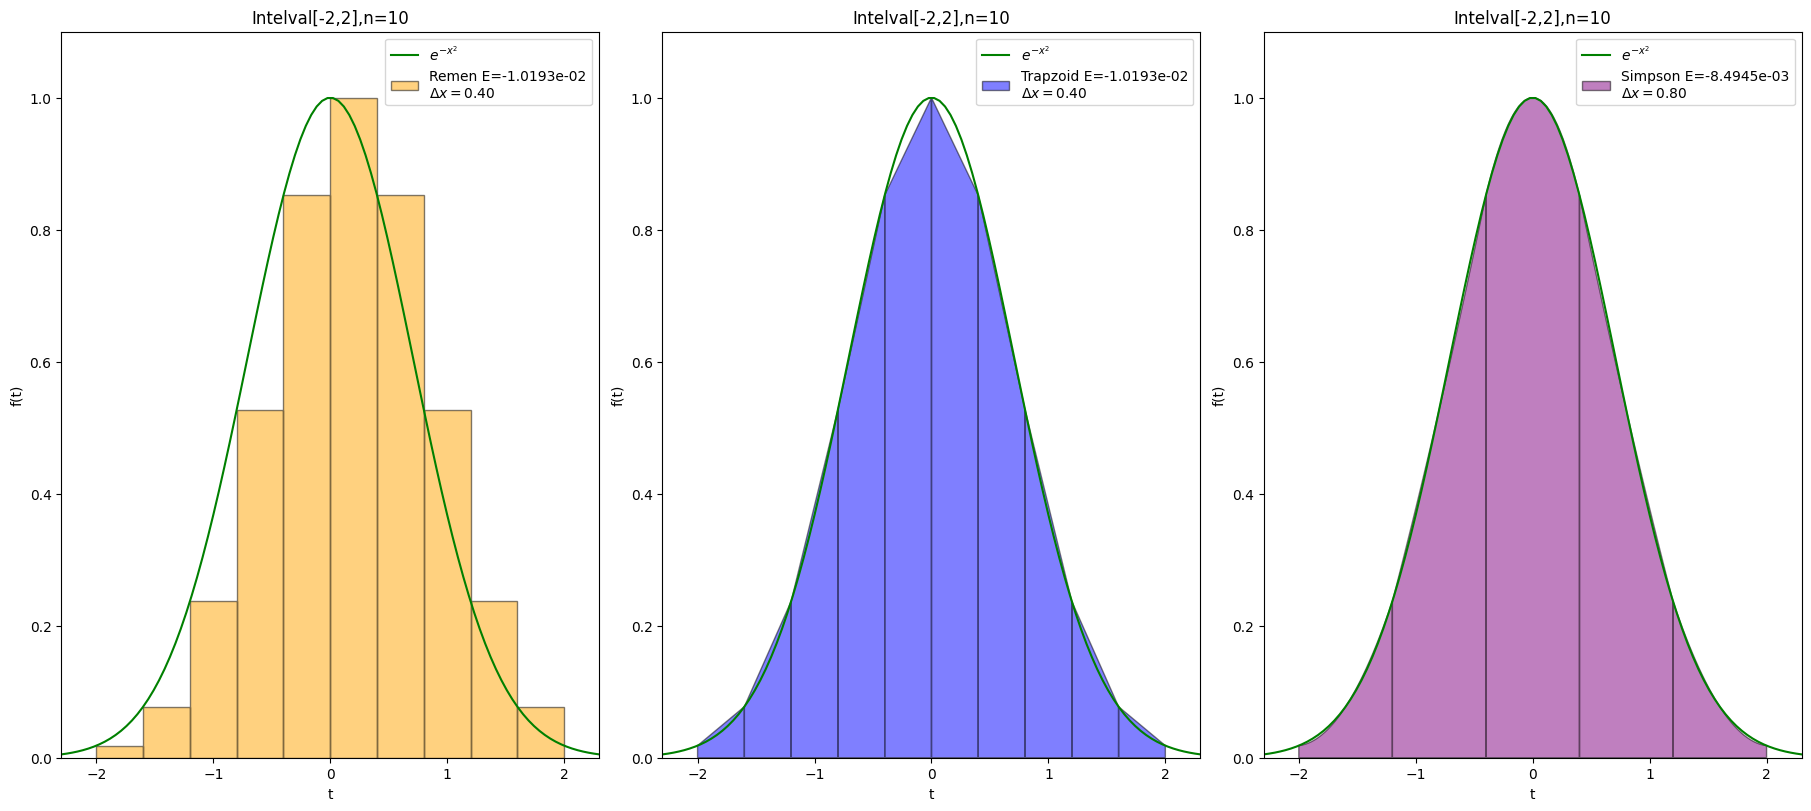

In [198]:
padding=0.3
title='Intelval[%d,%d],n=%d'%(a,b,n)


func_items=[]

for i in range(3):
    func_item=FuncPatch(gause_func,a-padding,b+padding,100)
    func_item.set_label('$e^{-x^2}$')
    func_item.set_color('green')
    
    func_items.append(func_item)
    

# 黎曼积分近似
remen_item=RemenPatch(gause_func,a,b,n)
remen_item.set_label('Remen E=%.4e\n$\Delta x=%.2f$'%(RemennApprox(gause_func,a,b,n)-gause_answer,(b-a)/n))
remen_item.set_facecolor('orange')
remen_item.set_alpha(0.5)

# trapzoid 积分近似
trapzoid_item=TrapZoidPatch(gause_func,a,b,n)
trapzoid_item.set_label('Trapzoid E=%.4e\n$\Delta x=%.2f$'%(TrapZoidApprox(gause_func,a,b,n)-gause_answer,(b-a)/n))
trapzoid_item.set_facecolor('blue')
trapzoid_item.set_alpha(0.5)


simpson_item=SimpsonsPatch(gause_func,a,b,n)
simpson_item.set_label('Simpson E=%.4e\n$\Delta x=%.2f$'%(SimpsonsApprox(gause_func,a,b,n)-gause_answer,2*(b-a)/n))
simpson_item.set_facecolor('purple')
simpson_item.set_alpha(0.5)


# 做图
fig,axes=plt.subplots(1,3,figsize=(18,8),layout='constrained')
for ax1 in axes:
    ax1.set_xlim(a-padding,b+padding)
    ax1.set_ylim(0,1.1)
    ax1.set_title('Intelval[%d,%d],n=%d'%(a,b,n))
drawGraph(axes[0],func_items[0],remen_item)
drawGraph(axes[1],func_items[1],trapzoid_item)
drawGraph(axes[2],func_items[2],simpson_item)
# drawGraph(axes[1],func_item,trapzoid_item)

$r(\theta)=\frac{1}{1+2cos(\theta)}$


$dA=\frac{1}{2}r^2d\theta$


$dA=\frac{1}{2}\frac{d\theta}{(1+2cos(\theta))^2}$

$A(\theta)=\int_{\theta_{0}}^{\theta} \frac{1}{2}\frac{d\theta}{(1+2cos(\theta))^2}$


$\frac{dA}{dt}=\frac{1}{2}r^2\frac{d\theta}{dt}=C$,角动量守恒


$A(\theta)=C * \Delta t$

In [23]:
f=lambda x:0.5*1/((1+2*np.cos(x))**2)

In [24]:
theta0=0
theta1=np.linspace(theta0,np.pi*0.6,100)
areas=[]
for t in  theta1:
    area=SimpsonsApprox(f,theta0,t,n)
    areas.append(area)

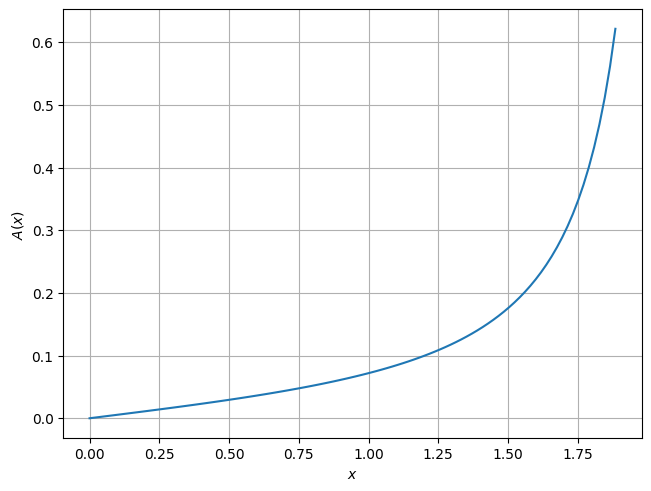

In [34]:
fig,ax=plt.subplots(layout='constrained')
ax.plot(theta1,areas)
ax.set_xlabel('$x$')
ax.set_ylabel('$A(x) $ ')
ax.grid()

In [151]:
y=0.5

# solve y=f(x)
def solve(f,y):
    lower=0
    upper=np.pi*0.9
     
    
    while True:
        middle=(lower+upper)/2
        r=SimpsonsApprox(f,0,middle,30)-y

        if r>0:
            upper=middle
        else:
            lower=middle
        if np.abs(r)<1e-5:
            break
    return middle
# r=SimpsonsApprox(f,0,middle,30)

In [162]:
x=solve(f,0.3)
SimpsonsApprox(f,0,x,300)

0.29996806244928614

In [163]:
x

1.7068100889357507

In [168]:
xxx=[1,2,3]
yyy=[4,5,6]
for aj in zip(xxx,yyy):
    print(aj)

(1, 4)
(2, 5)
(3, 6)
